<a href="https://colab.research.google.com/github/yahdiarif/Final-Project-kel-12/blob/main/Bank_Marketing_Target_Final_Project_(group_12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
 
 
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('train.csv', sep = ';')
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
38410,29,student,single,tertiary,no,80,yes,no,cellular,15,may,15,5,361,1,failure,no
6783,28,services,single,secondary,no,281,yes,no,unknown,28,may,201,1,-1,0,unknown,no
39653,32,management,married,tertiary,no,8,yes,no,cellular,26,may,175,2,-1,0,unknown,no
35527,43,blue-collar,married,secondary,no,1255,yes,yes,cellular,7,may,300,2,-1,0,unknown,no
43100,26,management,single,tertiary,no,0,no,no,cellular,23,feb,176,1,-1,0,unknown,no


In [ ]:
#banyak value dengan katagori 'unknown'. jadi kita rubah katagori 'unknown' menjadi NA agar terlihat missing value nya
df=df.replace('unknown', np.nan)

## Descriptive statistic

### Column, Value dan Dtype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
17. y - has the client subscribed a term deposit? (binary: "yes","no")

### Missing Value

In [ ]:
df.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

terdapat beberapa yang ada missing value (job,education,contact,poutcome) yang semuanya categorical

### Statistical Summary

In [ ]:
round(df.describe(),2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
(df['y'].value_counts()/df['y'].count())*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

## Univariate Analysis

In [ ]:
nums = ['age','balance','campaign','pdays','previous','duration']
cats = ['job','marital','education','contact','poutcome']
cats2=['default','housing','loan']
#untuk heatmap
nums2 = ['age','balance','campaign','pdays','previous','duration','target']


### Boxplot

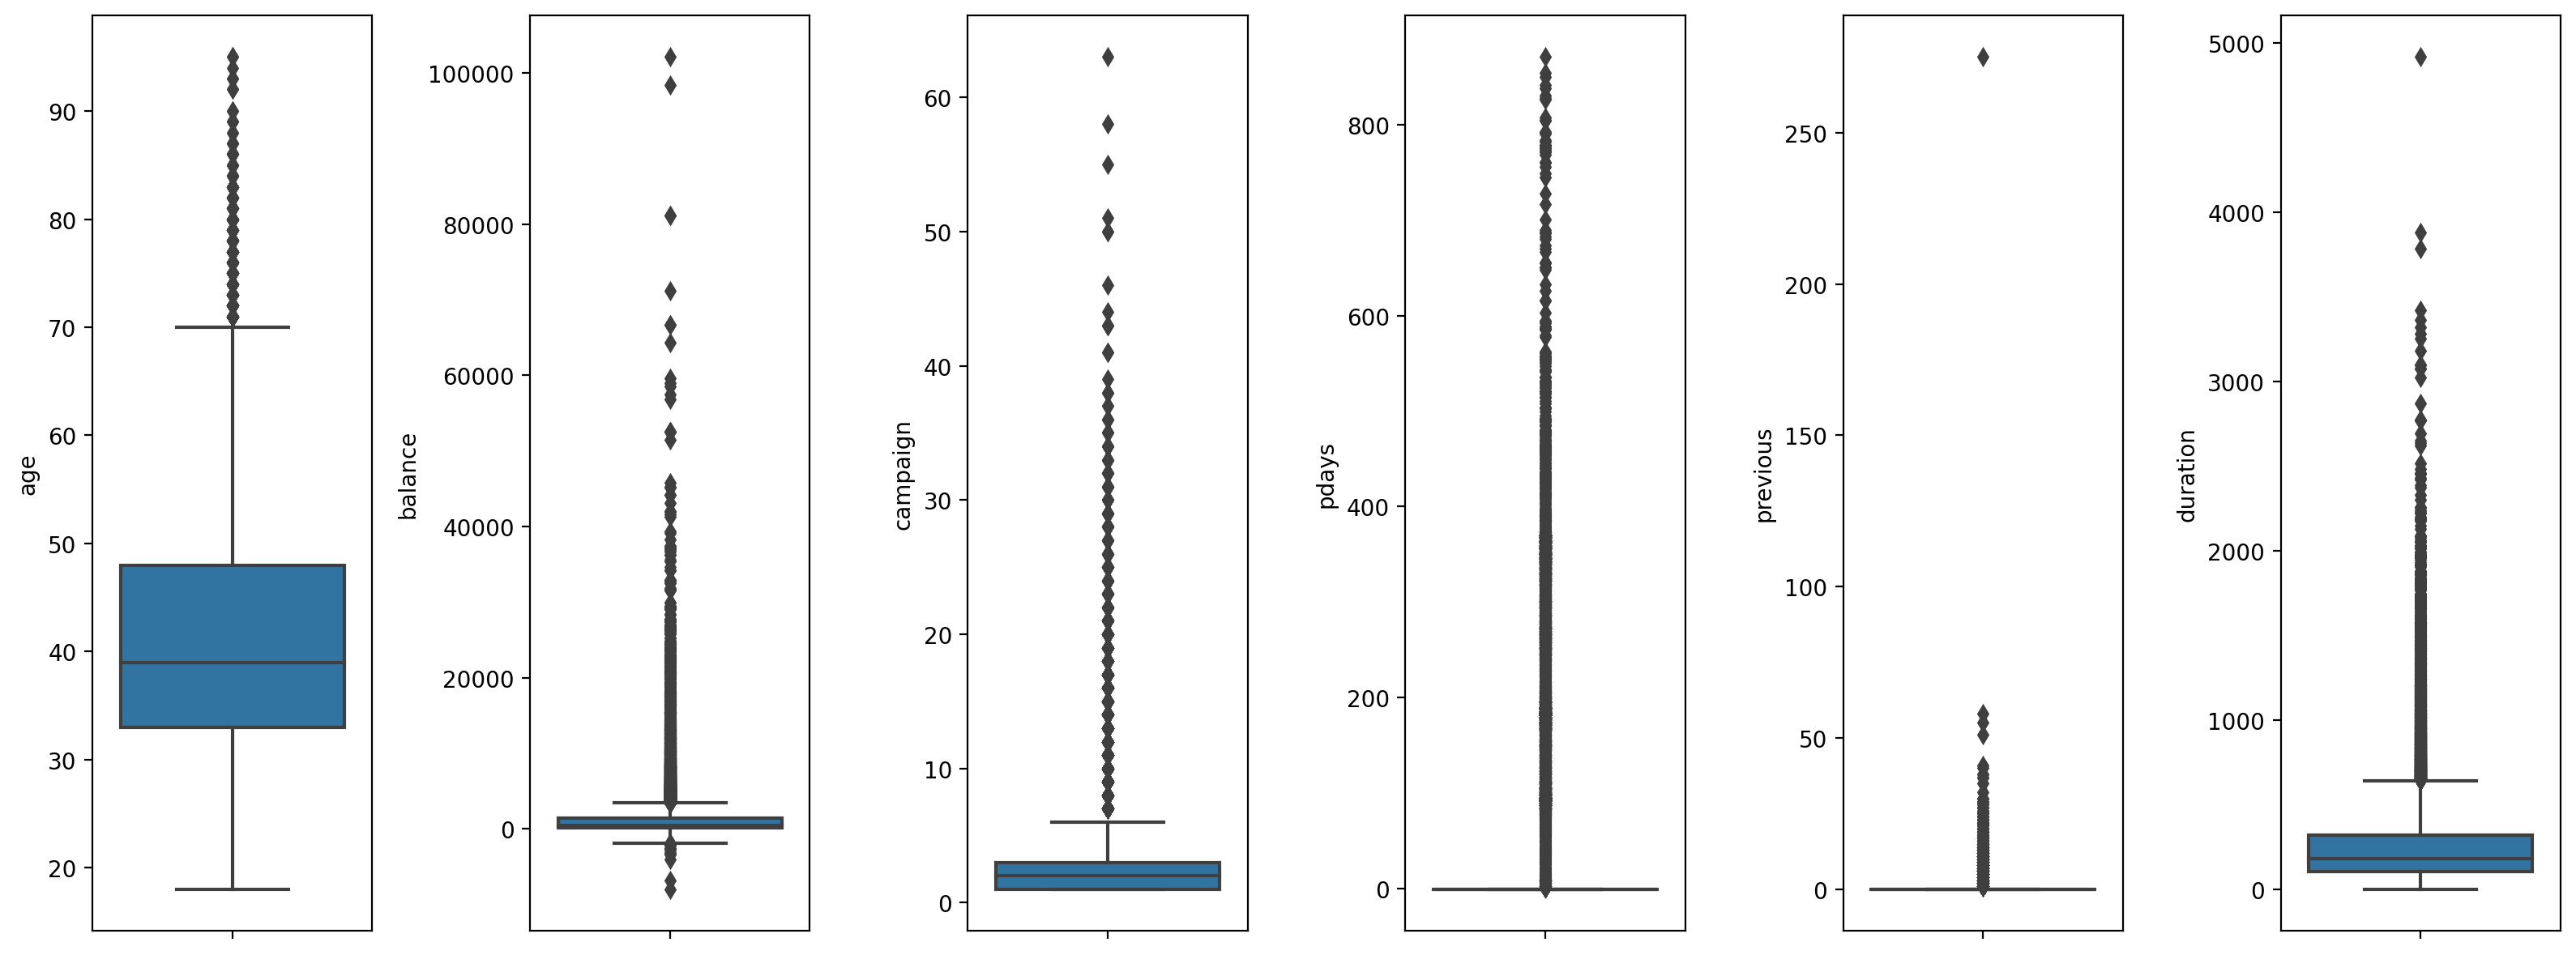

In [ ]:
plt.figure(figsize=(16,6),dpi=200)
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()
plt.savefig('boxplot_numerical.jpg')

### kdeplot

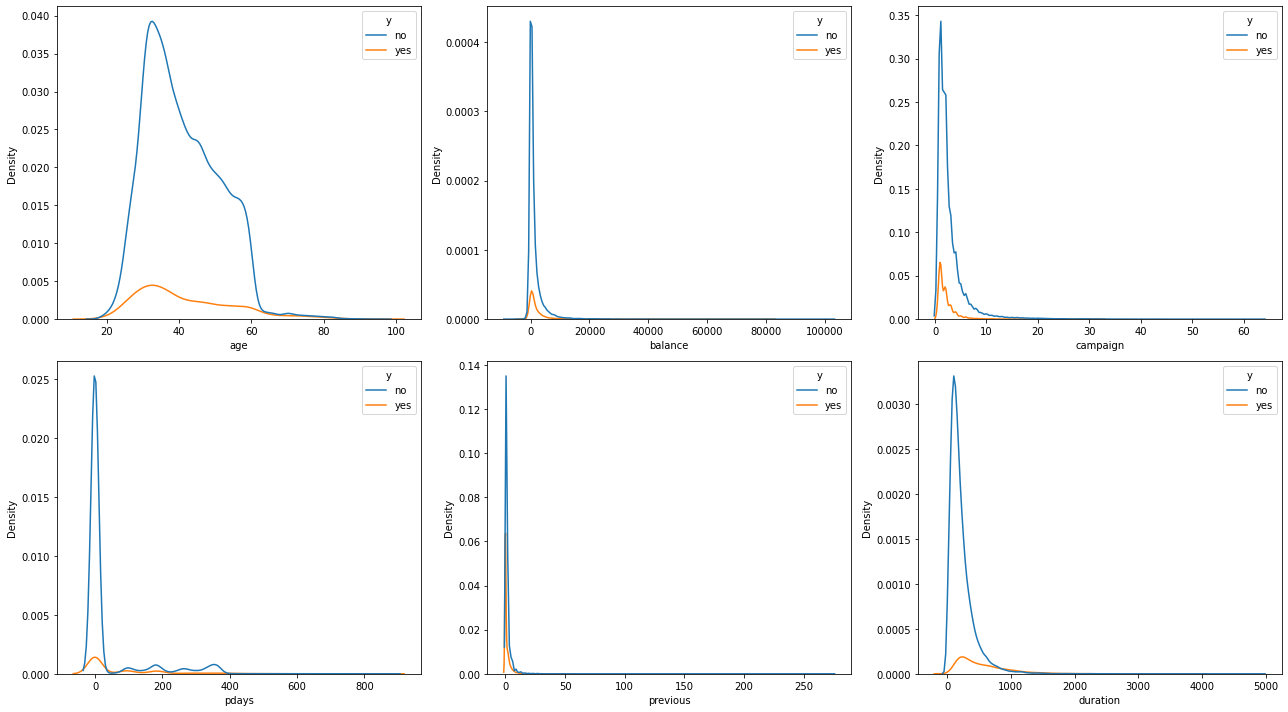

In [ ]:
plt.figure(figsize=(18,10))
for i in range(0,len(nums)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=df[nums[i]],data=df,hue='y')
    plt.xlabel(nums[i])
    plt.tight_layout()
plt.savefig('plot_dist.jpg')

### barplot

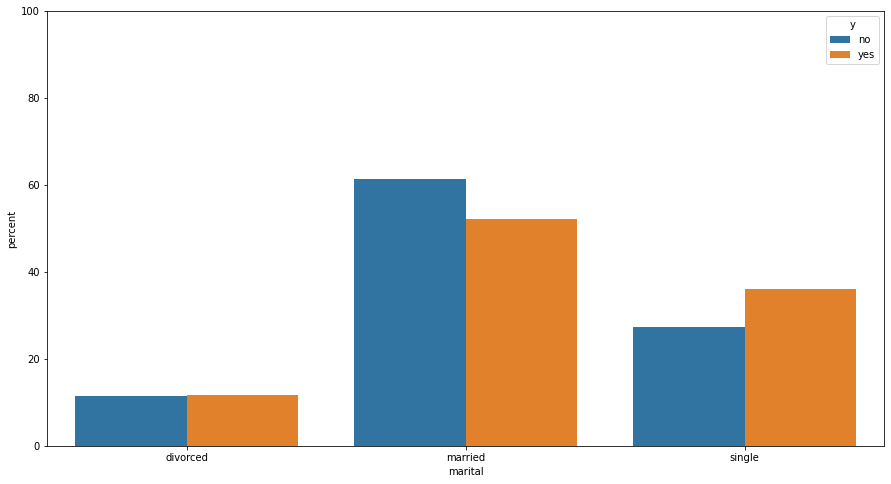

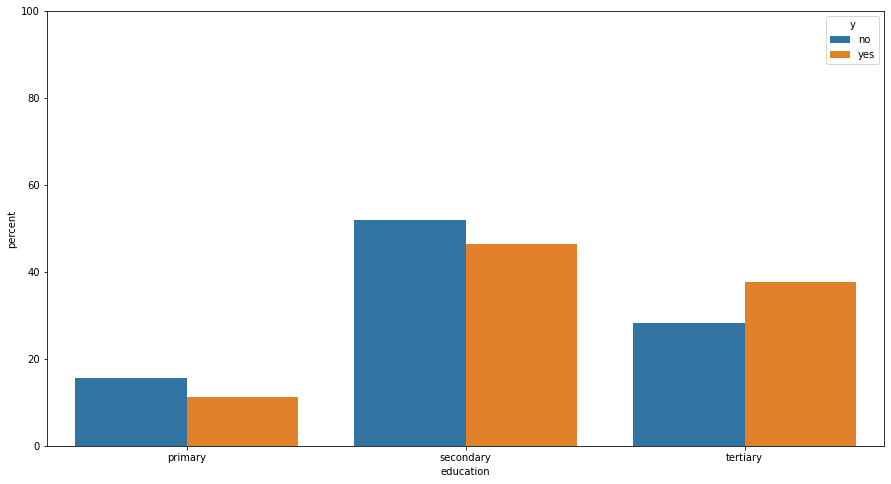

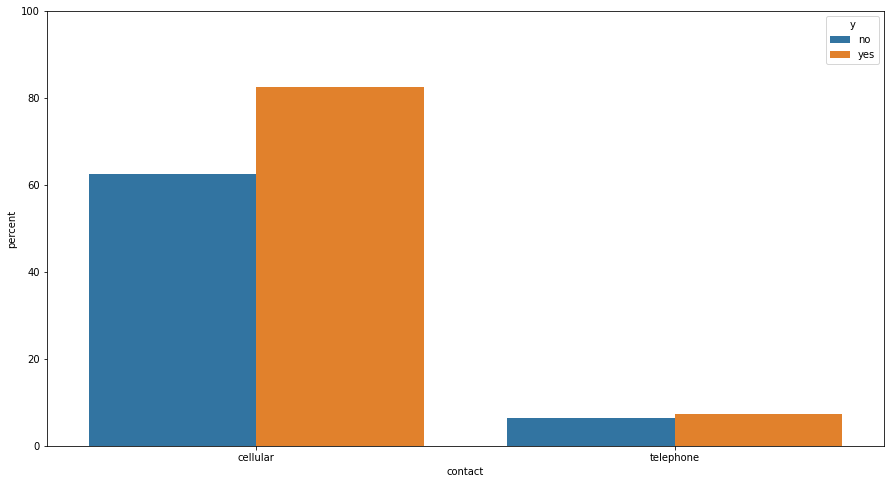

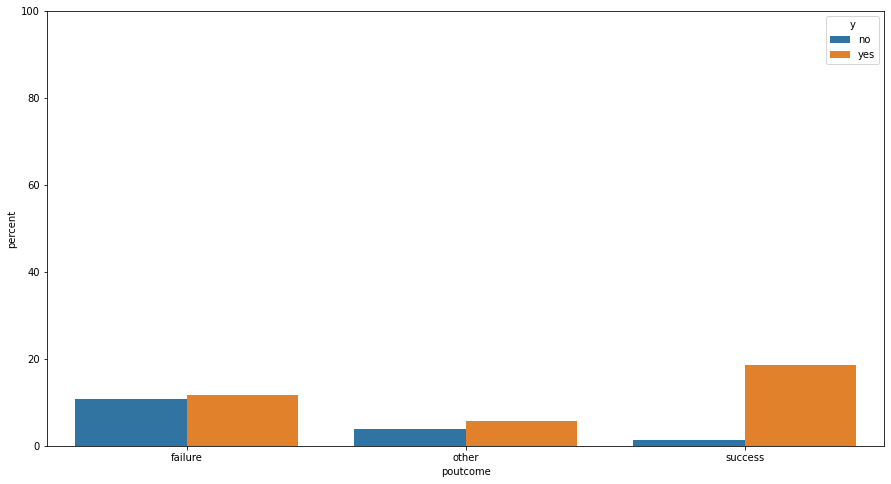

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in  range(1, len(cats)):
    plt.figure(figsize=(15,8))
    dfa = df.groupby([cats[i],'y'])['age'].count().reset_index()
    dfa.columns = [cats[i],'y','total']
    dfa['percent'] = np.where(dfa['y']=='yes', dfa['total']/df[df['y']=='yes']['age'].count()*100,
                              dfa['total']/df[df['y']=='no']['age'].count()*100)
    ax = sns.barplot(y='percent',x=cats[i],data = dfa, hue = 'y')
    ax.set(ylim=(0, 100))
    plt.show()
plt.savefig('cats.jpg')

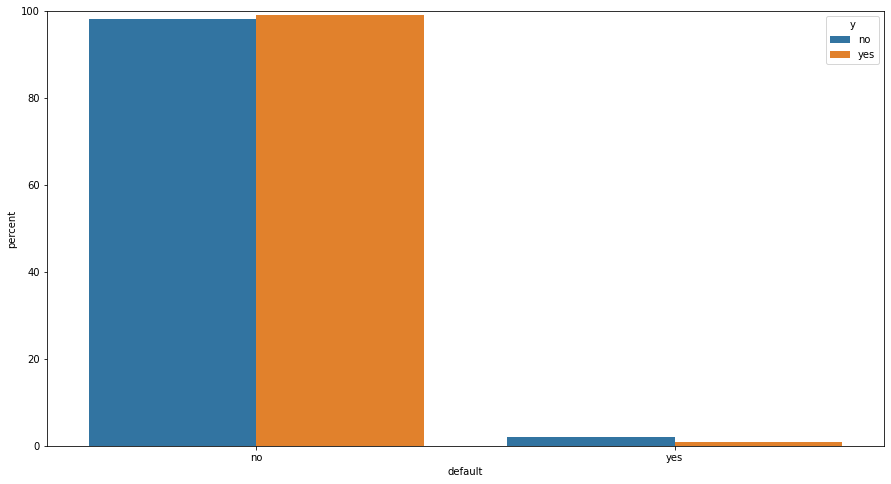

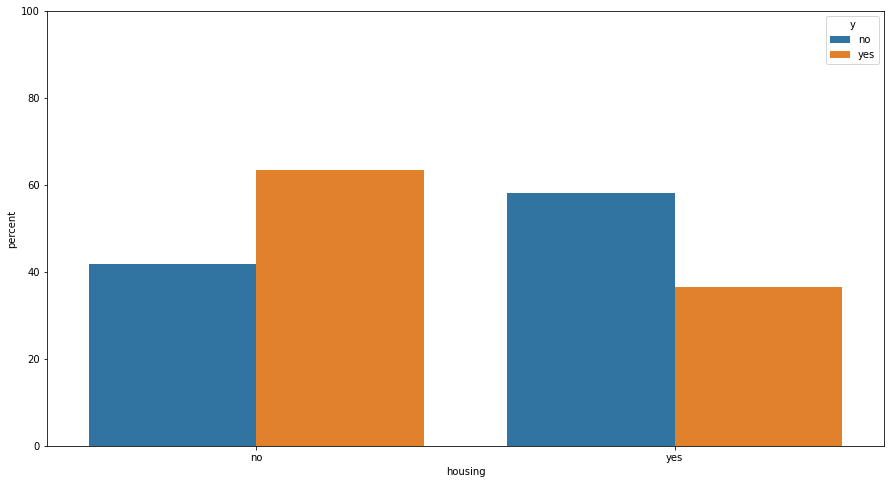

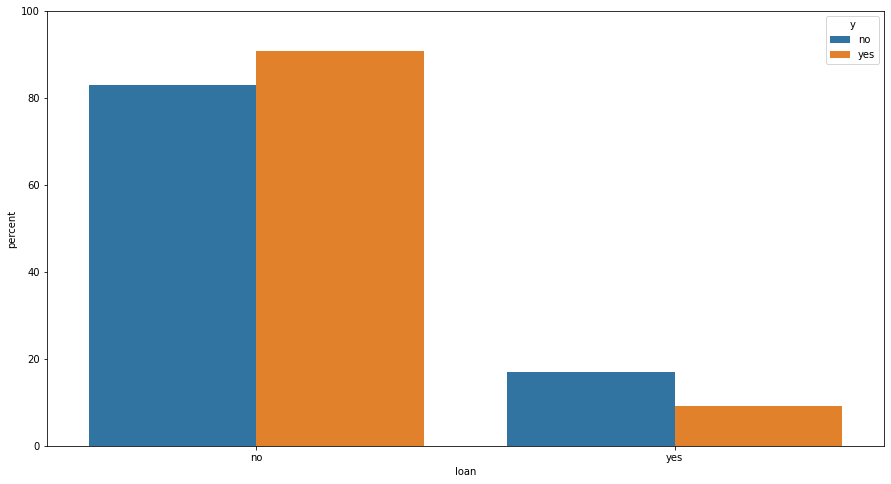

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in  range(0, len(cats2)):
    plt.figure(figsize=(15,8))
    dfa = df.groupby([cats2[i],'y'])['age'].count().reset_index()
    dfa.columns = [cats2[i],'y','total']
    dfa['percent'] = np.where(dfa['y']=='yes', dfa['total']/df[df['y']=='yes']['age'].count()*100,
                              dfa['total']/df[df['y']=='no']['age'].count()*100)
    ax = sns.barplot(y='percent',x=cats2[i],data = dfa, hue = 'y')
    ax.set(ylim=(0, 100))
    plt.show()
plt.savefig('cats2.jpg')

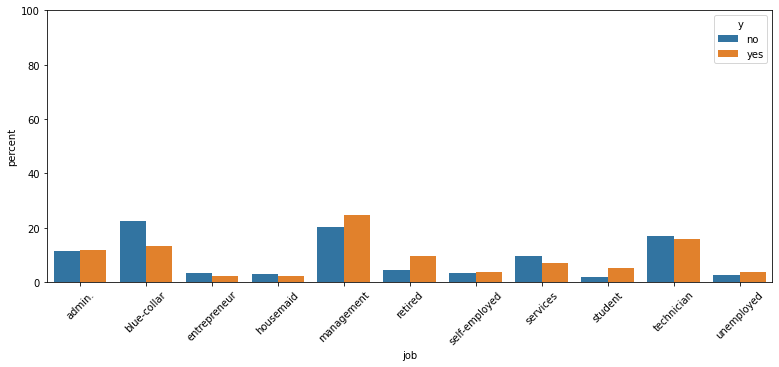

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(13,5))
dfa = df.groupby(['job','y'])['age'].count().reset_index()
dfa.columns = ['job','y','total']
dfa['percent'] = np.where(dfa['y']=='yes', dfa['total']/df[df['y']=='yes']['age'].count()*100,
                              dfa['total']/df[df['y']=='no']['age'].count()*100)
ax = sns.barplot(y='percent',x='job',data = dfa, hue = 'y')
plt.xticks(rotation = 45)
ax.set(ylim=(0, 100))
plt.show()
plt.savefig('job.jpg')

## Multivariate Analysis

### Heatmap

In [ ]:
#mapping y jadi angka dan menambahkan kolom ID
mapping={'yes':1,
         'no':0}
df['target']=df['y'].map(mapping)
df.insert(0, 'New_ID', range(1, 1 + len(df)))

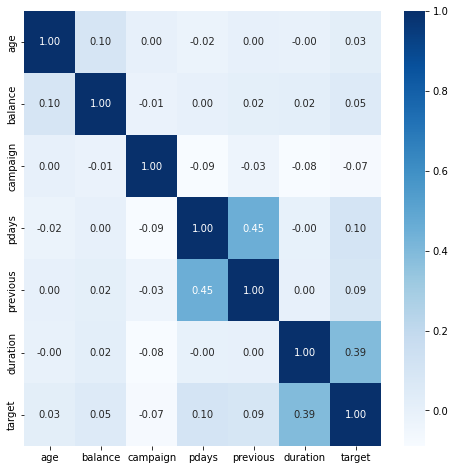

In [ ]:

plt.figure(figsize=(8, 8))
sns.heatmap(df[nums2].corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
# Multivariate Analysis

## Business Insight

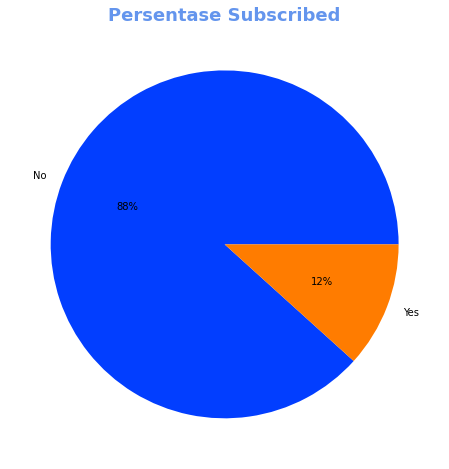

In [ ]:
data = [df[df['y']=='no']['y'].count(),df[df['y']=='yes']['y'].count()]
labels = ['No','Yes']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.figure(figsize=(10,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Persentase Subscribed',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.show()

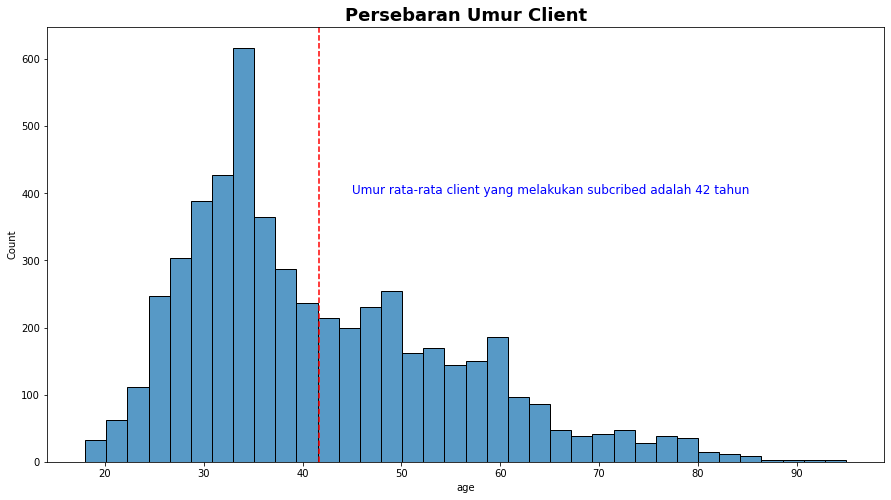

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.subplots(figsize=(15,8))
sns.histplot(data=df[df['y']=='yes'][['age','y']], x="age")
plt.axvline(((df[df['y']=='yes'][['age']]).mean().reset_index()[0][0]), linestyle='--', color='red')
plt.title('Persebaran Umur Client', fontsize=18, fontweight='bold')
plt.text(45, 400, s='Umur rata-rata client yang melakukan subcribed adalah 42 tahun',
         fontsize=12,
         color='blue')
plt.show()
plt.savefig('bi1.jpg')

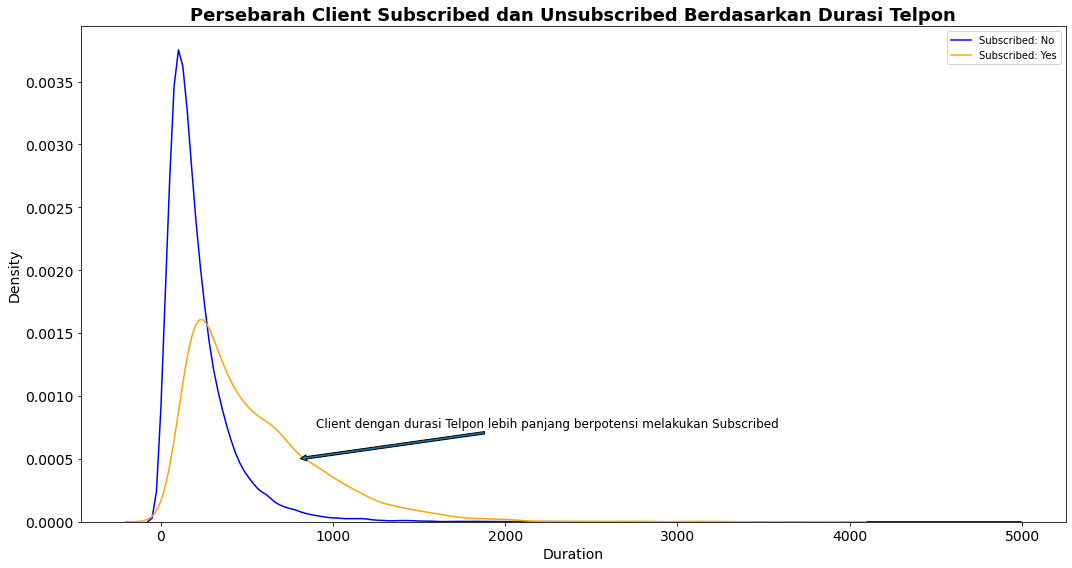

In [ ]:

fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='no']['duration'], color= 'blue', label= 'Subscribed: No', ax=ax)
sns.kdeplot(df[df['y']=='yes']['duration'], color= 'orange', label= 'Subscribed: Yes', ax=ax)

ax.set_title('Persebarah Client Subscribed dan Unsubscribed Berdasarkan Durasi Telpon',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Duration', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.annotate(xy=(800,0.0005), xytext=(900,0.00075), s='Client dengan durasi Telpon lebih panjang berpotensi melakukan Subscribed', fontsize=12,arrowprops=dict(ec='black',arrowstyle='simple',))
plt.legend()
plt.tight_layout()
plt.savefig('bi2.jpg')

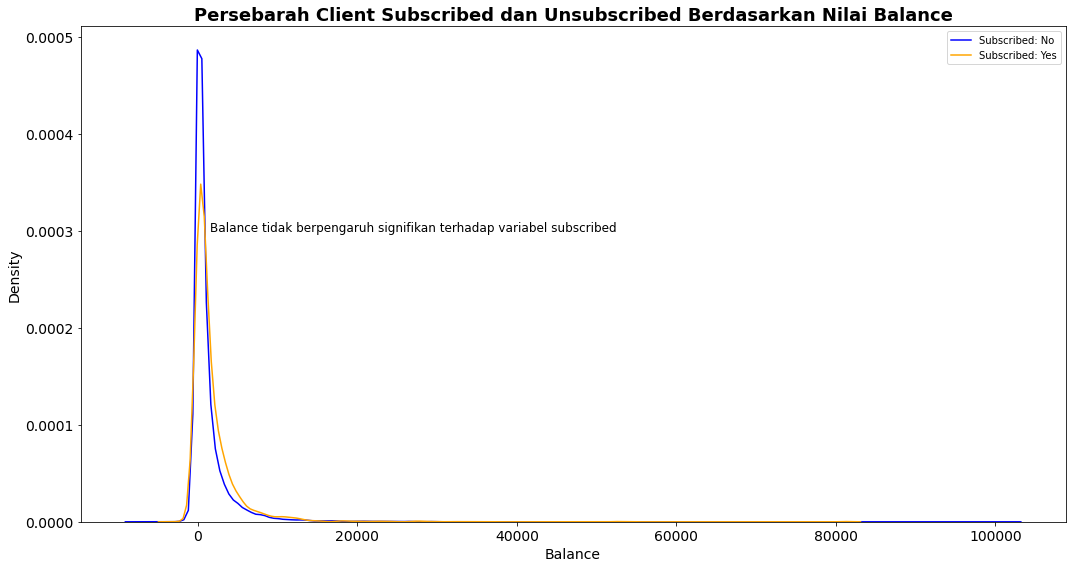

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='no']['balance'], color= 'blue', label= 'Subscribed: No', ax=ax)
sns.kdeplot(df[df['y']=='yes']['balance'], color= 'orange', label= 'Subscribed: Yes', ax=ax)
ax.set_title('Persebarah Client Subscribed dan Unsubscribed Berdasarkan Nilai Balance',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Balance', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.text(1500,0.0003,s='Balance tidak berpengaruh signifikan terhadap variabel subscribed',
         fontsize=12,
         color='black')
plt.legend()
plt.tight_layout()
plt.savefig('bi3.jpg')

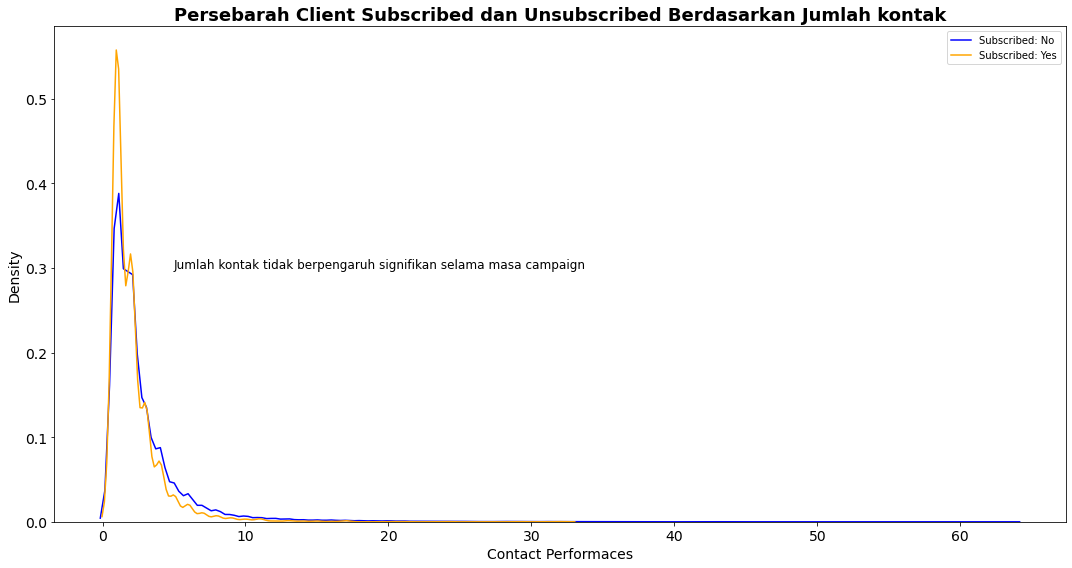

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='no']['campaign'], color= 'blue', label= 'Subscribed: No', ax=ax)
sns.kdeplot(df[df['y']=='yes']['campaign'], color= 'orange', label= 'Subscribed: Yes', ax=ax)
ax.set_title('Persebarah Client Subscribed dan Unsubscribed Berdasarkan Jumlah kontak',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Contact Performaces', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.text(5,0.3,s='Jumlah kontak tidak berpengaruh signifikan selama masa campaign',
         fontsize=12,
         color='black')
plt.legend()
plt.tight_layout()
plt.savefig('bi4.jpg')

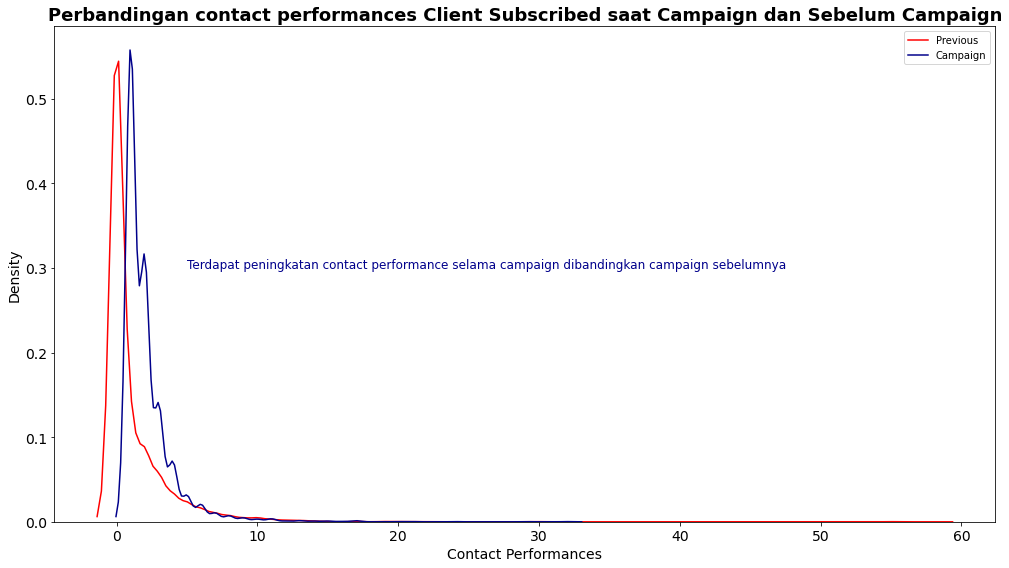

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='yes']['previous'], color= 'red', label= 'Previous', ax=ax)
sns.kdeplot(df[df['y']=='yes']['campaign'], color= 'darkblue', label= 'Campaign', ax=ax)
#plt.axvline(((df[df['y']=='yes'][['previous']]).mode()['previous'][0]), color='orange',linewidth=0.5)
#plt.axvline(((df[df['y']=='yes'][['campaign']]).mode()['campaign'][0]), color='orange',linewidth=0.5)
ax.set_title('Perbandingan contact performances Client Subscribed saat Campaign dan Sebelum Campaign',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Contact Performances', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.text(5,0.3,s='Terdapat peningkatan contact performance selama campaign dibandingkan campaign sebelumnya',
         fontsize=12,
         color='darkblue')
plt.legend()
plt.tight_layout()
plt.savefig('bi5.jpg')

,Kredit-Pinjaman,y,New_ID_x,New_ID_y,Ratio
0,no-no,no,32685,37453,87.269378
1,no-no,yes,4768,37453,12.730622
2,no-yes,no,6474,6943,93.244995
3,no-yes,yes,469,6943,6.755005
4,yes-no,no,477,514,92.801556
5,yes-no,yes,37,514,7.198444
6,yes-yes,no,286,301,95.016611
7,yes-yes,yes,15,301,4.983389


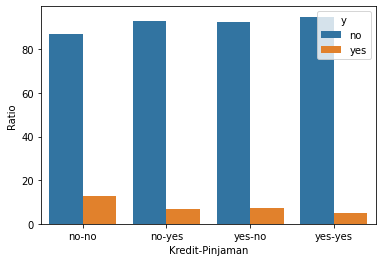

In [ ]:
df['Kredit-Pinjaman']=df['default']+'-'+df['loan']
df_dp2=df.groupby(['Kredit-Pinjaman','y'])['New_ID'].nunique().reset_index()
df_dp=df.groupby(['Kredit-Pinjaman',])['New_ID'].nunique().reset_index()
df_union_dp=df_dp2.merge(df_dp,on='Kredit-Pinjaman')
df_union_dp['Ratio']=df_union_dp['New_ID_x']*100/df_union_dp['New_ID_y']
sns.barplot(x="Kredit-Pinjaman", y="Ratio", data=df_union_dp, hue="y")
df_union_dp

,Con-Out,y,New_ID_x,New_ID_y,Ratio
0,1-failure,no,4283,4901,87.390329
1,1-failure,yes,618,4901,12.609671
2,1-other,no,1533,1840,83.315217
3,1-other,yes,307,1840,16.684783
4,1-success,no,533,1511,35.274653
5,1-success,yes,978,1511,64.725347


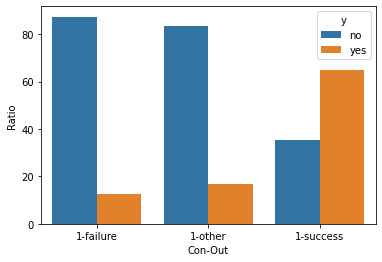

In [ ]:
df['contancted']=np.where(df['pdays']>0,1,0)
df['Con-Out']=df['contancted'].map(str)+'-'+df['poutcome']
df_dp2=df.groupby(['Con-Out','y'])['New_ID'].nunique().reset_index()
df_dp=df.groupby(['Con-Out',])['New_ID'].nunique().reset_index()
df_union_dp=df_dp2.merge(df_dp,on='Con-Out')
df_union_dp['Ratio']=df_union_dp['New_ID_x']*100/df_union_dp['New_ID_y']
sns.barplot(x="Con-Out", y="Ratio", data=df_union_dp, hue="y")
df_union_dp

# Stage 2

## Data Cleansing

### Handling missing Value

In [ ]:
df=df.drop(columns=['Kredit-Pinjaman','contancted','Con-Out','target','New_ID'])

In [ ]:
# imputasi kolom kategorikal dengan nilai yang paling sering muncul
df['poutcome'].fillna(df['poutcome'].mode()[0], inplace=True)
df['contact'].fillna(df['contact'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df.isna().sum()

age            0
job          288
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [ ]:
#drop unknown in job
df = df.dropna()

Unknown merupakan data dengan missing value pada Dataset Banking and Marketing
* Pada variable job, kami melakukan drop data karena jumlah data relatif sedikit
* Sedangkan pada variable education, contact, dan poutcome, kami menggunakan nilai modus untuk mengisi missing value dengan nilai terbanyak

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44923 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        44923 non-null  int64 
 1   job        44923 non-null  object
 2   marital    44923 non-null  object
 3   education  44923 non-null  object
 4   default    44923 non-null  object
 5   balance    44923 non-null  int64 
 6   housing    44923 non-null  object
 7   loan       44923 non-null  object
 8   contact    44923 non-null  object
 9   day        44923 non-null  int64 
 10  month      44923 non-null  object
 11  duration   44923 non-null  int64 
 12  campaign   44923 non-null  int64 
 13  pdays      44923 non-null  int64 
 14  previous   44923 non-null  int64 
 15  poutcome   44923 non-null  object
 16  y          44923 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


### Handling duplicated data

In [ ]:
df.duplicated().sum()

0

Tidak ada duplikasi data pada Dataset Banking and Marketing

In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36058,42,technician,married,secondary,no,162,yes,no,cellular,11,may,139,1,-1,0,failure,no
33702,55,blue-collar,married,primary,no,3873,no,no,telephone,21,apr,222,1,-1,0,failure,no
14502,35,services,married,secondary,no,819,yes,no,telephone,14,jul,102,14,-1,0,failure,no
9383,38,blue-collar,married,secondary,no,926,no,yes,cellular,6,jun,189,3,-1,0,failure,no
33549,28,admin.,married,secondary,no,49,yes,no,cellular,20,apr,17,3,-1,0,failure,no


### Handling Outliers

In [ ]:
from scipy import stats

In [ ]:
#mengubah nilai target menjadi numbering untuk melihat korelasi variable number terhadap target
df['subscribe'] = np.where(df['y']=='no',0, 1)

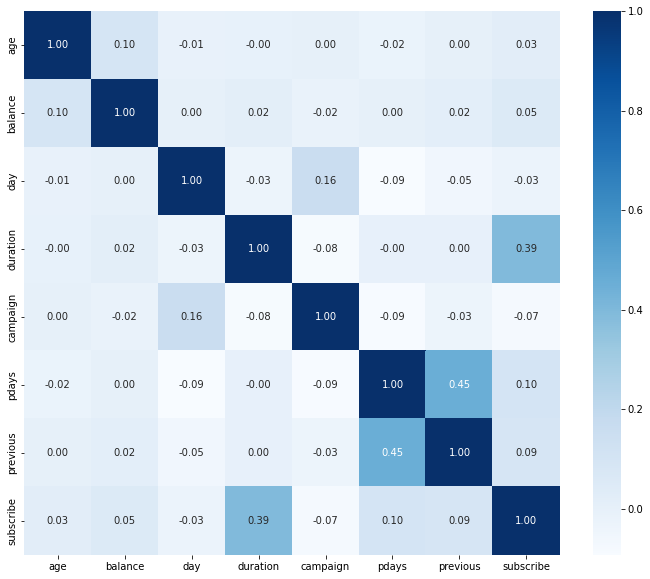

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Variable yang memiliki hubungan korelasi terbesar yaitu variable duration dengan nilai korelasi 0,39

In [ ]:
num = ['age','balance','duration','campaign','pdays','previous']

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))

for col in ['previous','duration','balance','campaign']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 44923
Jumlah baris setelah memfilter outlier: 41882


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['age']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 41882
Jumlah baris setelah memfilter outlier: 41444


#### after Imputation outlier

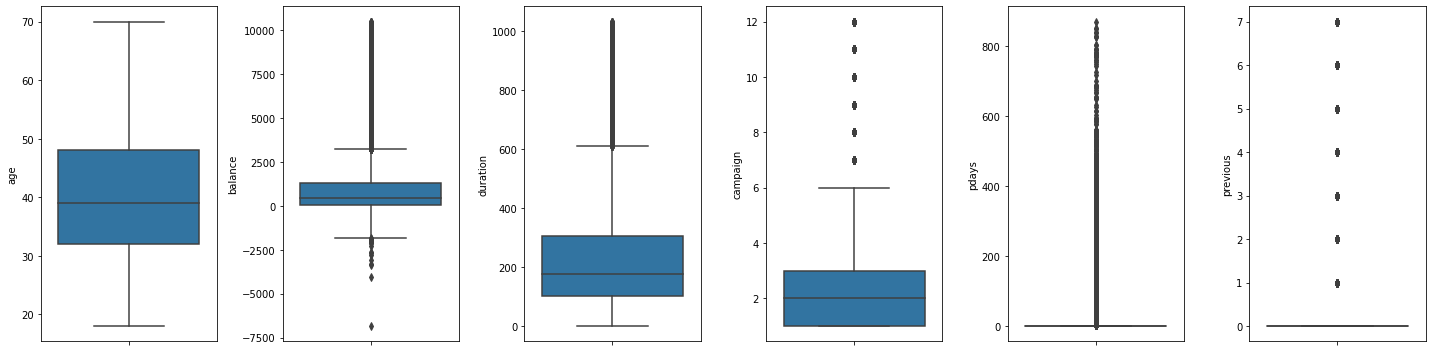

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]])
    plt.tight_layout()
plt.savefig('distribusi.jpg')

Masih terdapat outlier pada beberapa varible. Hal ini disebabkan oleh penggunaan metode z-score yang tidak menghapus seluruh outlier. Akan tetapi, pemilihan metode ini dilakukan agar jumlah data yang mengaalami clensing tidak banyak atau kurang dari 10%. Setelah dilakukan cleansing, jumlah data menjadi 41444 yang sebelumnya sebanyak 44923 dimana persentase cleansing data sebanyak 7,7%

### Feature Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df['age_norm'] = MinMaxScaler().fit_transform(df['age'].values.reshape(len(df), 1))
df['age_std'] = StandardScaler().fit_transform(df['age'].values.reshape(len(df), 1))
df['balance_norm'] = MinMaxScaler().fit_transform(df['balance'].values.reshape(len(df), 1))
df['balance_std'] = StandardScaler().fit_transform(df['balance'].values.reshape(len(df), 1))
df['day_norm'] = MinMaxScaler().fit_transform(df['day'].values.reshape(len(df), 1))
df['day_std'] = StandardScaler().fit_transform(df['day'].values.reshape(len(df), 1))
df['duration_norm'] = MinMaxScaler().fit_transform(df['duration'].values.reshape(len(df), 1))
df['duration_std'] = StandardScaler().fit_transform(df['duration'].values.reshape(len(df), 1))
df['campaign_norm'] = MinMaxScaler().fit_transform(df['campaign'].values.reshape(len(df), 1))
df['campaign_std'] = StandardScaler().fit_transform(df['campaign'].values.reshape(len(df), 1))
df['previous_norm'] = MinMaxScaler().fit_transform(df['previous'].values.reshape(len(df), 1))
df['previous_std'] = StandardScaler().fit_transform(df['previous'].values.reshape(len(df), 1))

#### raw data

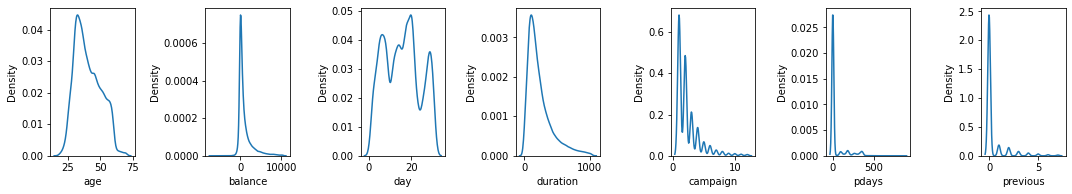

In [ ]:
#raw data
num = ['age','balance','day','duration','campaign','pdays','previous']
plt.figure(figsize=(15, 5))
for i in range(0, len(num)):
    plt.subplot(2, len(num), i+1)
    sns.kdeplot((df[num[i]]))
    plt.tight_layout()
plt.savefig('distribusi1.jpg')

#### normalisasi

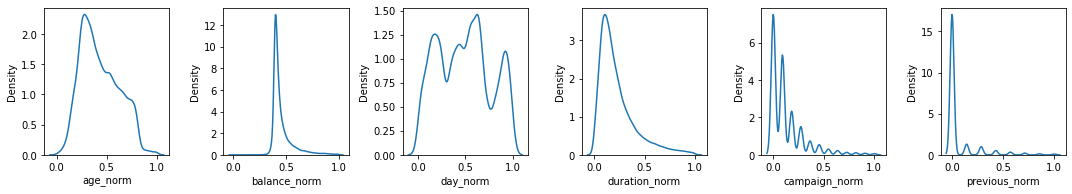

In [ ]:
#normalisasi
norm = ['age_norm','balance_norm','day_norm','duration_norm','campaign_norm','previous_norm']
plt.figure(figsize=(15, 5))
for i in range(0, len(norm)):
    plt.subplot(2, len(norm), i+1)
    sns.kdeplot((df[norm[i]]))
    plt.tight_layout()
plt.savefig('distribusi2.jpg')

#### standarirasi

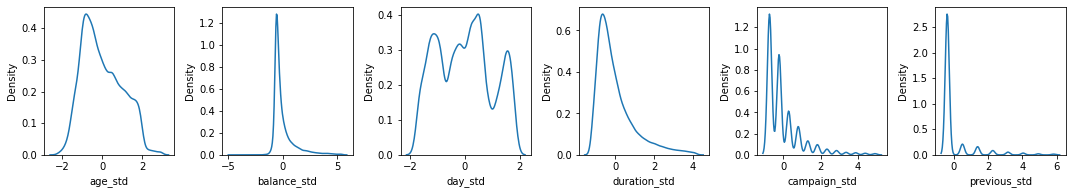

In [ ]:

std = ['age_std','balance_std','day_std','duration_std','campaign_std','previous_std']
plt.figure(figsize=(15, 5))
for i in range(0, len(std)):
    plt.subplot(2, len(std), i+1)
    sns.kdeplot((df[std[i]]))
    plt.tight_layout()
plt.savefig('distribusi3.jpg')

#### transformasi logaritma

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


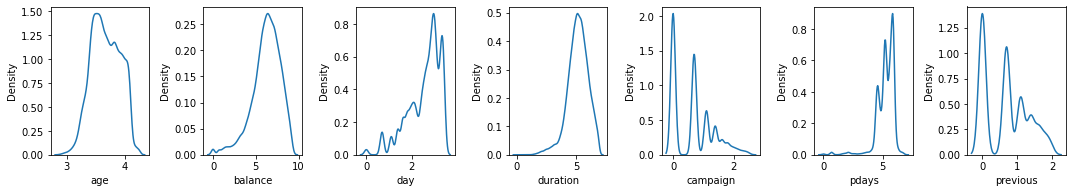

In [ ]:

plt.figure(figsize=(15, 5))
for i in range(0, len(num)):
    plt.subplot(2, len(num), i+1)
    sns.kdeplot(np.log(df[num[i]]))
    plt.tight_layout()
plt.savefig('distribusi4.jpg')

Setelah melakukan feature transformation terhadap ketiga metode, Kami memutuskan untuk mwnggunakan transformasi logaritma untuk variable balance dan duration, sedangkan untuk variable lainnya tidak dilakukan perubahan

In [ ]:
df['duration'].replace(0,np.min(df[df['duration']!=0]['duration']), inplace=True)

In [ ]:
df['duration_log'] = np.log(df['duration'])

In [ ]:
df = df.drop(columns=['age_std','age_norm','balance','balance_norm','balance_std',
                          'day_std','day_norm','duration','duration_norm','duration_std',
                          'campaign_norm','campaign_std','previous_norm','previous_std'])

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,subscribe,duration_log
0,58,management,married,tertiary,no,yes,no,cellular,5,may,1,-1,0,failure,no,0,5.564520
1,44,technician,single,secondary,no,yes,no,cellular,5,may,1,-1,0,failure,no,0,5.017280
2,33,entrepreneur,married,secondary,no,yes,yes,cellular,5,may,1,-1,0,failure,no,0,4.330733
3,47,blue-collar,married,secondary,no,yes,no,cellular,5,may,1,-1,0,failure,no,0,4.521789
5,35,management,married,tertiary,no,yes,no,cellular,5,may,1,-1,0,failure,no,0,4.934474


### Feature Encoding

In [ ]:
df.loc[:,(df.applymap(type)==str).all(0)]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,cellular,may,failure,no
1,technician,single,secondary,no,yes,no,cellular,may,failure,no
2,entrepreneur,married,secondary,no,yes,yes,cellular,may,failure,no
3,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
5,management,married,tertiary,no,yes,no,cellular,may,failure,no
...,...,...,...,...,...,...,...,...,...,...
45202,admin.,single,secondary,no,no,no,cellular,nov,failure,yes
45203,student,single,tertiary,no,no,no,cellular,nov,failure,yes
45205,technician,single,secondary,no,no,yes,cellular,nov,failure,yes
45206,technician,married,tertiary,no,no,no,cellular,nov,failure,yes


#### 1.Label Encoding

In [ ]:
df['marital'] = df['marital'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df['default'] = df['default'].astype('category').cat.codes
df['housing'] = df['housing'].astype('category').cat.codes
df['loan'] = df['loan'].astype('category').cat.codes
df['contact'] = df['contact'].astype('category').cat.codes
df['poutcome'] = df['poutcome'].astype('category').cat.codes

In [ ]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,subscribe,duration_log
19216,56,retired,1,1,0,0,0,0,6,aug,3,-1,0,0,no,0,4.727388
33069,32,management,2,2,0,1,1,0,20,apr,2,-1,0,0,no,0,4.997212
24020,31,management,2,2,0,0,0,1,29,aug,1,-1,0,0,no,0,3.931826
43800,32,admin.,2,1,0,0,0,0,26,may,2,-1,0,0,yes,1,6.272877
40841,32,blue-collar,2,2,0,1,1,0,11,aug,2,462,1,0,no,0,5.513429


#### 2.One-hot Encoding

In [ ]:
for cat in ['job','month']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
df.dtypes

age                    int64
job                   object
marital                 int8
education               int8
default                 int8
housing                 int8
loan                    int8
contact                 int8
day                    int64
month                 object
campaign               int64
pdays                  int64
previous               int64
poutcome                int8
y                     object
subscribe              int64
duration_log         float64
balance_log          float64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
month_apr              uint8
month_aug              uint8
month_dec              uint8
month_feb              uint8
month_jan              uint8
month_jul     

In [ ]:
df.drop(columns = ['month','job'], inplace=True)

In [ ]:
df.drop(columns='y', inplace=True)

## Feature Engineering

### 1.Feature Selection

In [ ]:
df.drop(columns='pdays',inplace=True)

Varible pday dihapus karena kurang relevan terhadap modeling yang akan dibuat

### 2.Feature Extraction

Kami tidak melakukan feature extraction karena setelah dilakukan feature extraction terhadap beberapa kolom yaitu kolom age, balance, dan duration, korelasi tidak berubah bahkan cenderung menurun

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41444 entries, 0 to 45209
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41444 non-null  int64  
 1   marital            41444 non-null  int8   
 2   education          41444 non-null  int8   
 3   default            41444 non-null  int8   
 4   housing            41444 non-null  int8   
 5   loan               41444 non-null  int8   
 6   contact            41444 non-null  int8   
 7   day                41444 non-null  int64  
 8   campaign           41444 non-null  int64  
 9   previous           41444 non-null  int64  
 10  poutcome           41444 non-null  int8   
 11  subscribe          41444 non-null  int64  
 12  duration_log       41444 non-null  float64
 13  job_admin.         41444 non-null  uint8  
 14  job_blue-collar    41444 non-null  uint8  
 15  job_entrepreneur   41444 non-null  uint8  
 16  job_housemaid      414

# Stage 3

## Class Imbalance

In [ ]:
df.subscribe.value_counts()


0    37222
1     4222
Name: subscribe, dtype: int64

In [ ]:
X = df.drop(columns = ['subscribe'])
y = df['subscribe']

In [ ]:
from imblearn import over_sampling
X_over, y_over = over_sampling.SMOTE().fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

## Modelling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    #print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    score = cross_validate(model, X_over, y_over, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### 1. Logistic Regression

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy (Test Set): 0.92
Precision (Test Set): 0.93
Precision (Train Set): 0.94
Recall (Test Set): 0.90
F1-Score (Test Set): 0.92
AUC (test-proba): 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


roc_auc (crossval train): 0.9774086932380393
roc_auc (crossval test): 0.9375498152007549


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### 2. Decision Tree

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.90
Precision (Train Set): 1.00
Recall (Test Set): 0.93
F1-Score (Test Set): 0.92
AUC (test-proba): 0.91
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7660207092744248


### 3. Random Forest

In [ ]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.94
Precision (Train Set): 1.00
Recall (Test Set): 0.95
F1-Score (Test Set): 0.95
AUC (test-proba): 0.99
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9622947580615309


### 4. XGBoost

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.89
Precision (Train Set): 0.89
Recall (Test Set): 0.93
F1-Score (Test Set): 0.91
AUC (test-proba): 0.97
roc_auc (crossval train): 0.9757597757635613
roc_auc (crossval test): 0.8946113354853175


param value: 17; train: 0.9718701844142523; test: 0.969897755869805
param value: 18; train: 0.9714830170632025; test: 0.9696298564109421
param value: 19; train: 0.9721482406114983; test: 0.9702573702463063
param value: 20; train: 0.9721137292182244; test: 0.9702608385248652
param value: 22; train: 0.9720890644394728; test: 0.9701149543085775
param value: 23; train: 0.9718529401337666; test: 0.969973452552943
param value: 24; train: 0.9721358507731037; test: 0.9702247203130051
param value: 26; train: 0.9717329593309896; test: 0.9699011800430872
param value: 27; train: 0.9717569906974822; test: 0.969920919159094
param value: 28; train: 0.971665363931602; test: 0.9698870503163339
param value: 30; train: 0.9713705142077103; test: 0.9694714422865658


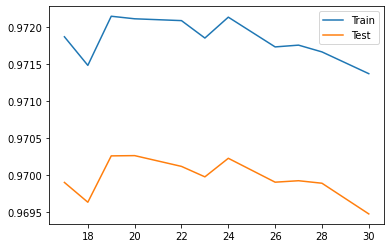

In [ ]:
#learning curve
param_values = [int(x) for x in np.linspace(17, 30, num = 11)] #min_child_weight
#param_values = [int(x) for x in np.linspace(30, 100, num = 11)] #max_depth

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(min_child_weight=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(30, 100, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(17, 30, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.94
Precision (Train Set): 0.96
Recall (Test Set): 0.95
F1-Score (Test Set): 0.94
AUC (test-proba): 0.99
roc_auc (crossval train): 0.9952655664670834
roc_auc (crossval test): 0.9492532981978176


## Feature Importance

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

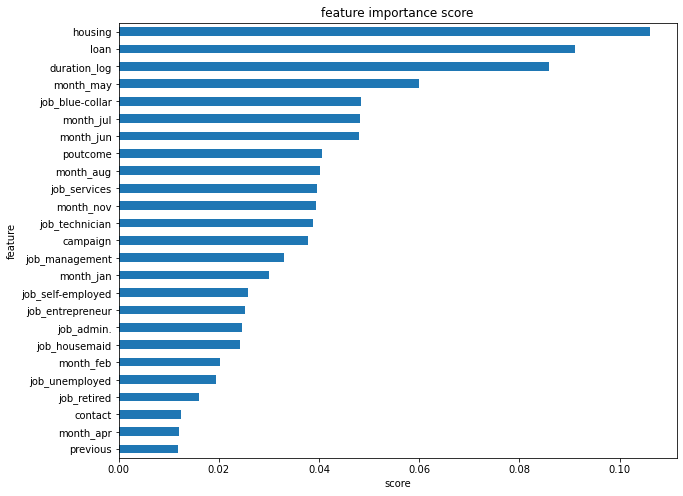

In [ ]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
show_feature_importance(xg)